# Regression With Video Game Sales

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [39]:
games = pd.read_csv('./data/Video_Games_Sales_as_at_22_Dec_2016.csv')

## EDA

In [40]:
game = games
game.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
game.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [185]:
game.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016089
Genre              0.000120
Publisher          0.003230
NA_Sales           0.000000
EU_Sales           0.000000
JP_Sales           0.000000
Other_Sales        0.000000
Global_Sales       0.000000
Critic_Score       0.513308
Critic_Count       0.513308
User_Score         0.400981
User_Count         0.546025
Developer          0.396136
Rating             0.404869
dtype: float64

In [42]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [189]:
game.groupby(by = game['Year_of_Release']).count()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Year_of_Release,,,,,,,,,,,,,,,
1980.0,9,9,9,9,9,9,9,9,9,0,0,0,0,0,0
1981.0,46,46,46,46,46,46,46,46,46,0,0,0,0,0,0
1982.0,36,36,36,36,36,36,36,36,36,0,0,0,0,0,0
1983.0,17,17,17,17,17,17,17,17,17,0,0,0,0,0,0
1984.0,14,14,14,14,14,14,14,14,14,0,0,0,0,0,0
1985.0,14,14,14,14,14,14,14,14,14,1,1,1,1,1,1
1986.0,21,21,21,21,21,21,21,21,21,0,0,0,0,0,0
1987.0,16,16,16,16,16,16,16,16,16,0,0,0,0,0,0
1988.0,15,15,15,15,15,15,15,15,15,1,1,1,1,1,1


In [44]:
game.loc[game['Year_of_Release']>2000]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


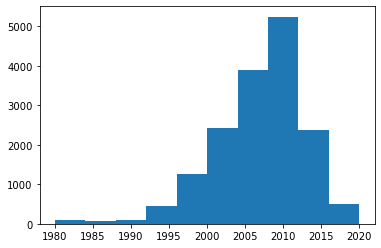

In [45]:
plt.hist(game['Year_of_Release']);

In [47]:
game.groupby(by = game['Genre']).mean()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Genre,,,,,,,,,
Action,2008.050181,0.260834,0.154045,0.047905,0.054777,0.517884,66.629101,27.780952,188.889617
Adventure,2008.263728,0.080783,0.048764,0.040138,0.012655,0.182417,65.331269,22.114551,103.410000
Fighting,2004.653524,0.263086,0.118174,0.103039,0.042827,0.527067,69.217604,27.909535,64.929825
Misc,2007.328298,0.232726,0.121566,0.061777,0.042509,0.458960,66.619503,21.533461,31.113895
Platform,2003.857631,0.501689,0.225619,0.147331,0.057534,0.932523,68.058350,23.698189,109.128505
Puzzle,2005.230228,0.211845,0.086224,0.098810,0.021345,0.419000,67.424107,20.308036,32.500000
Racing,2004.864600,0.287710,0.189359,0.045404,0.060929,0.583587,67.963612,23.028302,69.372855
Role-Playing,2007.130816,0.220540,0.125807,0.236973,0.039753,0.622933,72.652646,32.489824,320.746972
Shooter,2006.033179,0.447649,0.239864,0.029297,0.078692,0.795873,70.181144,35.610169,374.577922


In [50]:
print(game['NA_Sales'].mean()/game['Global_Sales'].mean())
print(game['EU_Sales'].mean()/game['Global_Sales'].mean())
print(game['JP_Sales'].mean()/game['Global_Sales'].mean())
print(game['Other_Sales'].mean()/game['Global_Sales'].mean())

0.49355066533633624
0.2718148492763916
0.1454469020099896
0.0887122630404547


### Some Graphs

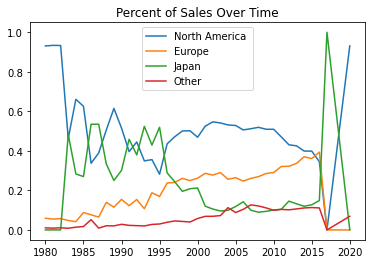

In [84]:
plt.plot(game['NA_Sales'].groupby(game['Year_of_Release']).mean()/game['Global_Sales'].groupby(game['Year_of_Release']).mean(), label='North America ') 
plt.plot(game['EU_Sales'].groupby(game['Year_of_Release']).mean()/game['Global_Sales'].groupby(game['Year_of_Release']).mean(), label='Europe')
plt.plot(game['JP_Sales'].groupby(game['Year_of_Release']).mean()/game['Global_Sales'].groupby(game['Year_of_Release']).mean(), label = 'Japan')  
plt.plot(game['Other_Sales'].groupby(game['Year_of_Release']).mean()/game['Global_Sales'].groupby(game['Year_of_Release']).mean(), label = 'Other') 
plt.legend()
plt.title('Percent of Sales Over Time');

<AxesSubplot:>

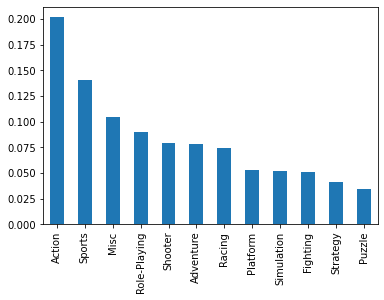

In [112]:
game['Genre'].value_counts(normalize=True).plot(kind = 'bar')


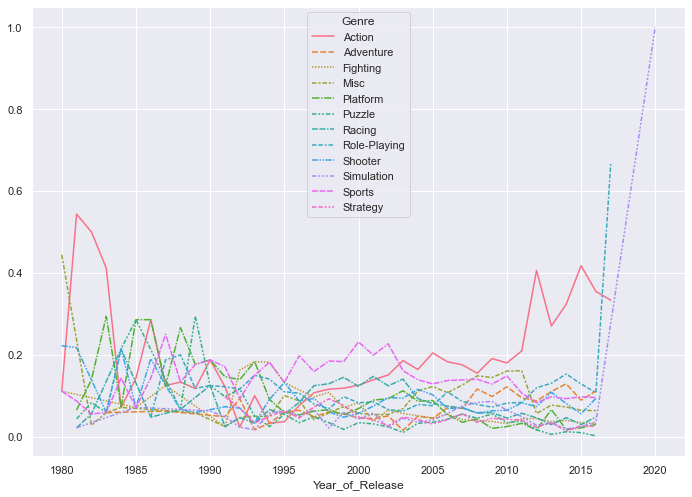

In [182]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # crdit to student on stack overflow
sns.lineplot(data = game['Genre'].groupby(by = game['Year_of_Release']).value_counts(normalize=True).unstack());

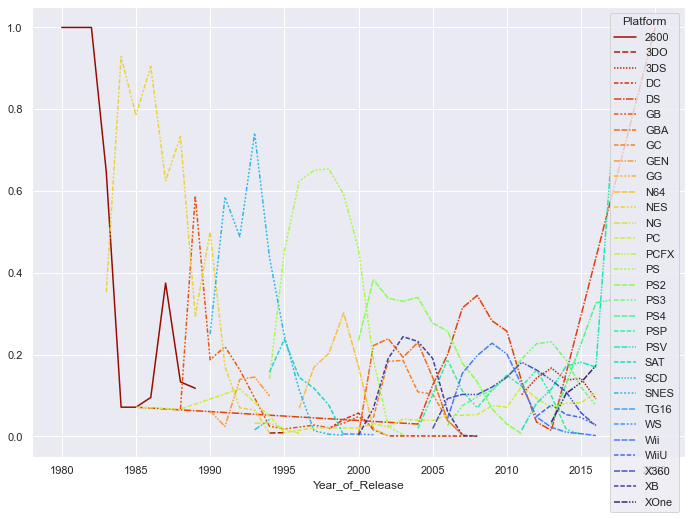

In [203]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # crdit to student on stack overflow
sns.lineplot(data = game['Platform'].groupby(by = game['Year_of_Release']).value_counts(normalize=True).unstack(), palette = 'turbo_r');

In [9]:
game.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,0.175339
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.246429
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.283360
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.075638
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.238982
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,1.000000


In [10]:
game['User_Score'].unique()
game['User_Score'].replace('tbd',np.nan,inplace=True)
game['User_Score'] = game['User_Score'].astype(float)

In [11]:
game['Critic_Score'].fillna(game['Critic_Score'].mean(), inplace=True)
game['Critic_Count'].fillna(game['Critic_Count'].mean(), inplace=True)
game['User_Score'].fillna(game['User_Score'].mean(), inplace=True)
game['User_Count'].fillna(game['User_Count'].mean(), inplace=True)
game['Year_of_Release'].fillna(game['Year_of_Release'].mean(), inplace=True)

## FIRST MODEL

In [12]:
game = pd.get_dummies(data=game,columns=['Name','Platform','Genre','Publisher','Developer','Rating'])

In [13]:
features = game.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

In [14]:
X = features
y = game['Global_Sales']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.isnull().sum()

Year_of_Release    0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
                  ..
Rating_EC          0
Rating_K-A         0
Rating_M           0
Rating_RP          0
Rating_T           0
Length: 13895, dtype: int64

In [16]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [17]:
lasso = Lasso()

In [18]:
lasso.fit(X_train_sc,y_train)

Lasso()

In [19]:
lasso.score(X_train_sc,y_train)

0.0

In [20]:
lasso.score(X_test_sc,y_test)

-0.00014628295911300881

In [21]:
#game_no_na = games.dropna()

In [22]:
#game_no_na = pd.get_dummies(data=game_no_na,columns=['Name','Platform','Genre','Publisher','Developer','Rating'])

In [23]:
#features = game_no_na.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

In [24]:
#X = features
#y = game_no_na['Global_Sales']

In [25]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)


In [26]:
#sc = StandardScaler()
#X_train_sc = sc.fit_transform(X_train)
#X_test_sc = sc.fit_transform(X_test)

In [27]:
#lasso.fit(X_train,y_train)
#print(lasso.score(X_train_sc,y_train))
#print(lasso.score(X_test_sc,y_test))

In [28]:
# Tensorflow 
#X_train_sc.shape

## SECOND MODEL

In [29]:
def model_func(layer_one_neurons = 6084, layer_two_neurons = 5929, layer_two = True):
    
    model = Sequential()
    model.add(Dense(units = layer_one_neurons, activation = 'relu', input_shape = (X_train_sc.shape[1], )))
    
    if layer_two:
        model.add(Dense(units = layer_two_neurons, activation = 'relu'))
        
    model.add(Dense(units = 1, activation = None))
    
    model.compile(loss = 'mse', optimizer = 'adam')
    
    return model

In [30]:
idk = KerasRegressor(build_fn = model_func, epochs = 10, batch_size = 256, validation_data = (X_test_sc,y_test))

In [187]:
bad_model = idk.fit(X_train_sc,y_train)

Epoch 1/10
49/49 [==============================] - 49s 982ms/step - loss: 398.4175 - val_loss: 3.6610
Epoch 2/10
49/49 [==============================] - 54s 1s/step - loss: 2.1190 - val_loss: 3.6053
Epoch 3/10
49/49 [==============================] - 52s 1s/step - loss: 2.0303 - val_loss: 3.5423
Epoch 4/10
49/49 [==============================] - 51s 1s/step - loss: 1.4562 - val_loss: 3.2500
Epoch 5/10
49/49 [==============================] - 57s 1s/step - loss: 1.2363 - val_loss: 3.3586
Epoch 6/10
49/49 [==============================] - 53s 1s/step - loss: 1.0747 - val_loss: 3.3364
Epoch 7/10
49/49 [==============================] - 59s 1s/step - loss: 0.5023 - val_loss: 3.2310
Epoch 8/10
49/49 [==============================] - 57s 1s/step - loss: 0.4204 - val_loss: 3.2575
Epoch 9/10
49/49 [==============================] - 56s 1s/step - loss: 0.3425 - val_loss: 3.2527
Epoch 10/10
49/49 [==============================] - 58s 1s/step - loss: 0.2915 - val_loss: 3.1547


In [190]:
print(idk.score(X_train_sc,y_train))
print(idk.score(X_test_sc,y_test))

49/49 [==============================] - 12s 244ms/step - loss: 0.2162
-0.2162294089794159
17/17 [==============================] - 7s 440ms/step - loss: 3.1547
-3.154726028442383


In [192]:
y_pred_test = idk.predict(X_test_sc)
print(r2_score(y_true = y_test, y_pred = y_pred_test))

0.09856694963943136


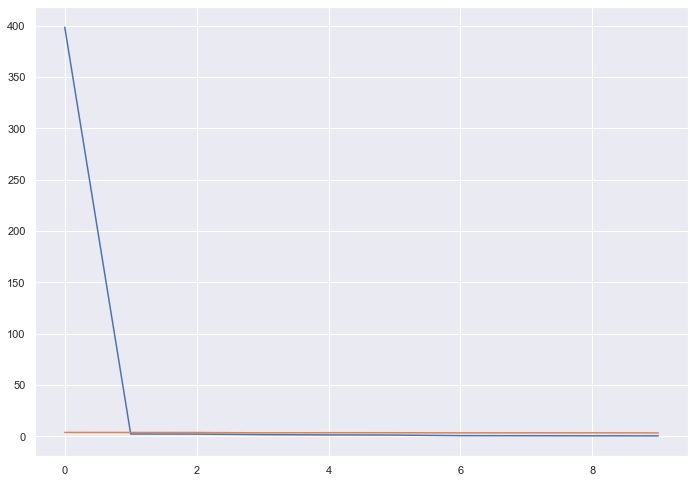

In [188]:
plt.plot(bad_model.history['loss'], label='training')
plt.plot(bad_model.history['val_loss'], label='testing')